import pandas as pd

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [170]:
df=pd.read_csv('2G09  439428.csv')

In [171]:
df

,Unnamed: 0,DataPoint,Cycle Index,Step Index,Step Type,Step Time,Voltage(V),Current(A),Capacity(Ah),Energy(Wh),date_time
0,0,1,1,1,Rest,0,3.6185,0.00000,0.000000,0.000000,2023-02-07 16:37:30
1,1,2,1,1,Rest,30,3.6185,0.00000,0.000000,0.000000,2023-02-07 16:38:00
2,2,3,1,1,Rest,60,3.6185,0.00000,0.000000,0.000000,2023-02-07 16:38:30
3,3,4,1,1,Rest,90,3.6185,0.00000,0.000000,0.000000,2023-02-07 16:39:00
4,4,5,1,1,Rest,120,3.6185,0.00000,0.000000,0.000000,2023-02-07 16:39:30
...,...,...,...,...,...,...,...,...,...,...,...
621135,621135,621136,753,3010,CCCV_Chg,840,3.7555,5.00111,1.166928,4.302767,2023-07-03 14:17:43
621136,621136,621137,753,3010,CCCV_Chg,850,3.7571,5.00111,1.180820,4.354947,2023-07-03 14:17:53
621137,621137,621138,753,3010,CCCV_Chg,860,3.7580,5.00111,1.194713,4.407146,2023-07-03 14:18:03
621138,621138,621139,753,3010,CCCV_Chg,870,3.7593,5.00148,1.208605,4.459359,2023-07-03 14:18:13


In [172]:
x=df[df['Step Type']=='CCCV_Chg']                                 #we take only charging data
x['dq']=x['Capacity(Ah)']-x['Capacity(Ah)'].shift(1,fill_value=0) 
x['dv']=x['Voltage(V)']-x['Voltage(V)'].shift(1,fill_value=0)
x['dq/dv']=x['dq']/x['dv']                                        # calculated the dq/dv for charging data
x = x.drop(x[np.isinf(x['dq/dv'])].index)                         # and droped the infinte values 

Calculating and Plotting DQ/DV of a single cell for different Cycle.

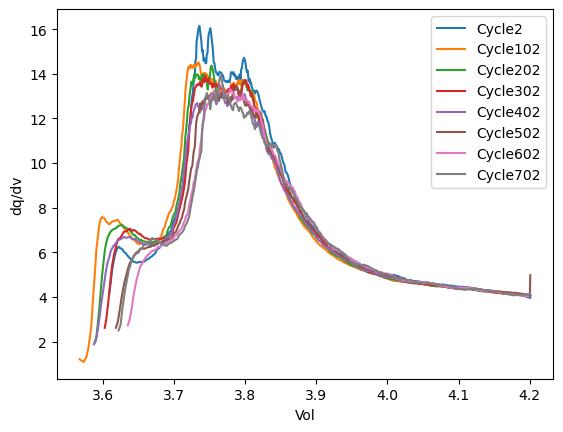

In [166]:

for i in range (2,x['Cycle Index'].max(),100):
    x1=x[x['Cycle Index']==i] 

    #we want to calaculate dq/dv till the 1st max value of vol. in every cycle.
    
    y=(x1['Step Time'][x1['Voltage(V)']==x1['Voltage(V)'].max()]).min() #we find the 'step time' for which our vol becomes max for the 1st time.
    x1=x1[x1['Step Time']<y]                                            # and take the dataset upto that particular step time.
    
    w=10                                                      # we took window size of 10 to calculate the moving average of dq/dv
    x1['dq/dvavg'] = x1['dq/dv'].rolling(window =w,win_type='gaussian',center=False).mean(std=3)
    
    y3=x1['dq/dvavg']                                                   #put that average dq/dv in a column 
    
    x2=x1['Voltage(V)']
    plt.plot(x2,y3,label='Cycle{i}'.format (i=i))
    plt.xlabel('Vol')
    plt.ylabel('dq/dv')
    plt.legend()
    

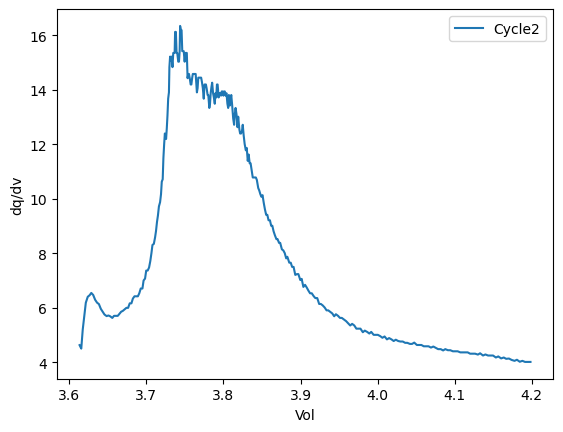

In [175]:
x1=x[x['Cycle Index']==5]                                           #we want to calaculate dq/dv till the 1st max value of vol. in every cycle.    
y=(x1['Step Time'][x1['Voltage(V)']==x1['Voltage(V)'].max()]).min() #we find the 'step time' for which our vol becomes max for the 1st time.
x1=x1[x1['Step Time']<y]                                            # and take the dataset upto that particular step time.
    
window_size=10                                                      # we took window size of 10 to calculate the moving average of dq/dv
x1['dq/dvavg'] = x1['dq/dv'].rolling(window_size).mean()
    
y3=x1['dq/dvavg']                                                   #put that average dq/dv in a column 
    
x2=x1['Voltage(V)']
plt.plot(x2,y3,label='Cycle{i}'.format (i=2))
plt.xlabel('Vol')
plt.ylabel('dq/dv')
plt.legend()
    